# Strain ellipse

## Polar decomposition

Pluging **LEFT polar decomposition** $\boldsymbol{F} = \boldsymbol{V} \cdot \boldsymbol{R}$ to equation for **LEFT Cauchy-Green deformation tensor** $\boldsymbol{B}=\boldsymbol{F}\cdot\boldsymbol{F}^T$ results in:
$$\boldsymbol{B}=\boldsymbol{V}^2$$

Pluging **RIGHT polar decomposition** $\boldsymbol{F} = \boldsymbol{R} \cdot \boldsymbol{U}$ to equation for **RIGHT Cauchy-Green deformation tensor** $\boldsymbol{C}=\boldsymbol{F}^T\cdot\boldsymbol{F}$ results in:
$$\boldsymbol{C}=\boldsymbol{U}^2$$

## Let's Python it

We also import our `sg2lib` library for deformation visualization. Some special function for polar decomposition, square root of matrix etc. could be found in SciPy linalg module, which is imported by `sg2lib` with alias `la`.

In [1]:
%pylab inline
from sg2lib import *

Populating the interactive namespace from numpy and matplotlib


Lets define deformation gradient matrix $\boldsymbol{F}$

In [2]:
F = array([[1, 1], [0, 1]])

Now we can calculate both **LEFT** and **RIGHT Cauchy-Green deformation tensors** $\boldsymbol{B}$ and $\boldsymbol{C}$

In [3]:
# calculate left Cauchy-Green tensor
B = dot(F, F.T)
# calculate right Cauchy-Green tensor
C = dot(F.T, F)

Than **left stretch tensor** $\boldsymbol{V}$ could be calculated as:

[[ 1.34164079  0.4472136 ]
 [ 0.4472136   0.89442719]]


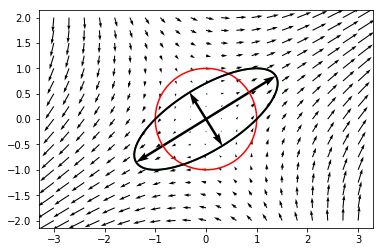

In [4]:
V = la.sqrtm(B)
print(V)
def_show(V)

while **right stretch tensor** $\boldsymbol{U}$ could be calculated as:

[[ 0.89442719  0.4472136 ]
 [ 0.4472136   1.34164079]]


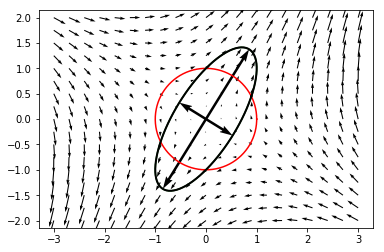

In [5]:
U = la.sqrtm(C)
print(U)
def_show(U)

Identical results can be calculated using SciPy polar decomposition function:

[[ 1.34164079  0.4472136 ]
 [ 0.4472136   0.89442719]]


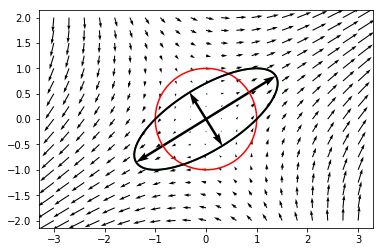

In [6]:
R, V = la.polar(F, 'left')
print(V)
def_show(V)

[[ 0.89442719  0.4472136 ]
 [ 0.4472136   1.34164079]]


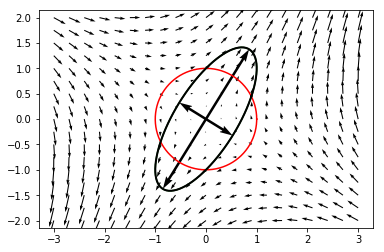

In [7]:
R, U = la.polar(F, 'right')
print(U)
def_show(U)

## Properties of strain ellipse

The eigenvectors of $\boldsymbol{B}$ define orientation of principal axes of the **strain ellipse/ellipsiod** in deformed state. The eigenvalues are quadratic elogations along principal directions, i.e. the lengths of semi-axes of the strain ellipse or ellipsoid are the square roots of the corresponding eigenvalues of $\boldsymbol{B}$.

So in Python, to calculate orientation and axial ratio of strain ellipse for deformation gradient $\mathbf{F}$, we can use **LEFT Cauchy-Green deformation tensor** $\boldsymbol{B}$ and following code (*Note the square root of axial ratio*):

In [8]:
evals, evecs = eig(B)
# calculate axial ratio and orientation
ar = sqrt(max(evals) / min(evals))
x, y = evecs[:, evals.argmax()]
ori = degrees(arctan2(y, x))
print('Orientation: {}\nAxial ratio: {}'.format(ori, ar))

Orientation: 31.717474411461005
Axial ratio: 2.618033988749895


or we can use **left stretch tensor** $\boldsymbol{V}$ and following code:

In [9]:
evals, evecs = eig(V)
# calculate axial ratio and orientation
ar = max(evals) / min(evals)
x, y = evecs[:, evals.argmax()]
ori = degrees(arctan2(y, x))
print('Orientation: {}\nAxial ratio: {}'.format(ori, ar))

Orientation: 31.71747441146101
Axial ratio: 2.6180339887498953


## Properties of reciprocal ellipse

The eigenvectors of $\boldsymbol{C}$ define orientation of principal axes of the
**reciprocal ellipse/ellipsoid** in undeformed state. The eigenvalues are quadratic
elongations along principal directions, i.e. the lengths of semi-axes of the reciprocal
ellipse or ellipsoid are the square roots of the corresponding eigenvalues of $\boldsymbol{C}$.

To calculate orientation and axial ratio of reciprocal ellipse for deformation gradient $\mathbf{F}$, we can use **RIGHT Cauchy-Green deformation tensor** $\boldsymbol{C}$ and following code (*Note the square root of axial ratio*):

In [10]:
evals, evecs = eig(C)
# calculate axial ratio and orientation
ar = sqrt(max(evals) / min(evals))
x, y = evecs[:, evals.argmax()]
ori = degrees(arctan2(y, x))
print('Orientation: {}\nAxial ratio: {}'.format(ori, ar))

Orientation: -121.717474411461
Axial ratio: 2.618033988749895


or we can use **right stretch tensor** $\boldsymbol{U}$ and following code:

In [11]:
evals, evecs = eig(U)
# calculate axial ratio and orientation
ar = max(evals) / min(evals)
x, y = evecs[:, evals.argmax()]
ori = degrees(arctan2(y, x))
print('Orientation: {}\nAxial ratio: {}'.format(ori, ar))

Orientation: -121.717474411461
Axial ratio: 2.6180339887498953


## Properties of simple shear

Following script will calculate evolution of orientation of finite strain ellipse major axis in simple shear in respect to $\gamma$

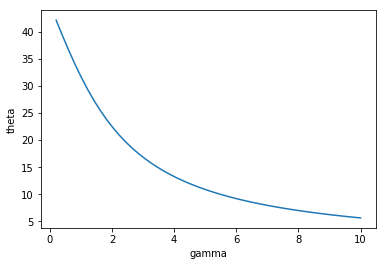

In [12]:
gammas = linspace(0, 10, 50)[1:]
thetas = []
for gamma in gammas:
    F = array([[1, gamma],[0, 1]])
    B = dot(F, F.T)
    e,v = eig(B)
    x, y = v[:, e.argmax()]
    thetas.append(degrees(arctan2(y, x)))
plot(gammas, thetas)
xlabel('gamma')
ylabel('theta');

and axial ration of finite strain ellipse in simple shear in respect to $\gamma$

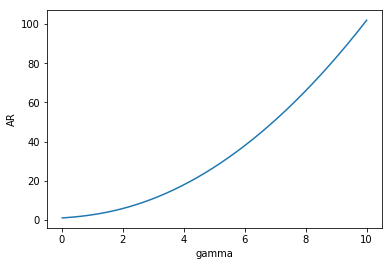

In [13]:
gammas = linspace(0, 10, 1000)[1:]
ars = []
for gamma in gammas:
    F = array([[1, gamma],[0, 1]])
    B = dot(F, F.T)
    e,v = eig(B)
    ars.append(sqrt(max(e)/min(e)))
plot(gammas, ars)
xlabel('gamma')
ylabel('AR');

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()